### Deliverable 1: Preprocessing the Data for a Neural Network

In [1]:
# Import our dependencies
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,OneHotEncoder
import pandas as pd
import tensorflow as tf

# Import checkpoint dependencies
import os
from tensorflow.keras.callbacks import ModelCheckpoint

#  Import and read the charity_data.csv.
import pandas as pd 
application_df = pd.read_csv("Resources/charity_data.csv")
application_df.head()

,EIN,NAME,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL
0,10520599,BLUE KNIGHTS MOTORCYCLE CLUB,T10,Independent,C1000,ProductDev,Association,1,0,N,5000,1
1,10531628,AMERICAN CHESAPEAKE CLUB CHARITABLE TR,T3,Independent,C2000,Preservation,Co-operative,1,1-9999,N,108590,1
2,10547893,ST CLOUD PROFESSIONAL FIREFIGHTERS,T5,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0
3,10553066,SOUTHSIDE ATHLETIC ASSOCIATION,T3,CompanySponsored,C2000,Preservation,Trust,1,10000-24999,N,6692,1
4,10556103,GENETIC RESEARCH INSTITUTE OF THE DESERT,T3,Independent,C1000,Heathcare,Trust,1,100000-499999,N,142590,1


In [2]:
# Drop the non-beneficial ID columns, 'EIN' and 'NAME'.
application_df = application_df.drop(["EIN", "NAME"], axis=1)
application_df.head()

,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL
0,T10,Independent,C1000,ProductDev,Association,1,0,N,5000,1
1,T3,Independent,C2000,Preservation,Co-operative,1,1-9999,N,108590,1
2,T5,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0
3,T3,CompanySponsored,C2000,Preservation,Trust,1,10000-24999,N,6692,1
4,T3,Independent,C1000,Heathcare,Trust,1,100000-499999,N,142590,1


In [3]:
# Determine the number of unique values in each column.
application_df.nunique()

APPLICATION_TYPE            17
AFFILIATION                  6
CLASSIFICATION              71
USE_CASE                     5
ORGANIZATION                 4
STATUS                       2
INCOME_AMT                   9
SPECIAL_CONSIDERATIONS       2
ASK_AMT                   8747
IS_SUCCESSFUL                2
dtype: int64

In [4]:
# Look at APPLICATION_TYPE value counts for binning
application_df_application_counts = application_df['APPLICATION_TYPE'].value_counts()
application_df_application_counts

T3     27037
T4      1542
T6      1216
T5      1173
T19     1065
T8       737
T7       725
T10      528
T9       156
T13       66
T12       27
T2        16
T14        3
T25        3
T15        2
T29        2
T17        1
Name: APPLICATION_TYPE, dtype: int64

<AxesSubplot:ylabel='Density'>

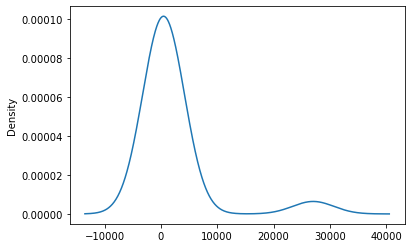

In [5]:
# Visualize the value counts of APPLICATION_TYPE
application_df_application_counts.plot.density()

According to the density plot, the most common unique values have more than 250 instances within the dataset. Therefore, we can bucket any application type that appears fewer than 250 times in the dataset as "other." To do this, we'll use a Python for loop and Pandas' replace method. To our notebooks, we need to add and run the following code:

In [6]:
# Determine which values to replace if counts are less than ...?
replace_application = list(application_df_application_counts[application_df_application_counts < 250].index)

# Replace in dataframe
for app in replace_application:
    application_df.APPLICATION_TYPE = application_df.APPLICATION_TYPE.replace(app,"Other")
    
# Check to make sure binning was successful
application_df.APPLICATION_TYPE.value_counts()

T3       27037
T4        1542
T6        1216
T5        1173
T19       1065
T8         737
T7         725
T10        528
Other      276
Name: APPLICATION_TYPE, dtype: int64

In [7]:
# Look at CLASSIFICATION value counts for binning
application_df_classification_counts = application_df['CLASSIFICATION'].value_counts()
application_df_classification_counts

C1000    17326
C2000     6074
C1200     4837
C3000     1918
C2100     1883
         ...  
C2500        1
C3700        1
C1283        1
C4200        1
C1245        1
Name: CLASSIFICATION, Length: 71, dtype: int64

<AxesSubplot:ylabel='Density'>

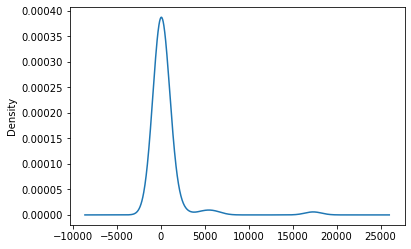

In [8]:
# Visualize the value counts of CLASSIFICATION
application_df_classification_counts.plot.density()

According to the density plot, the most common unique values have more than 3000 instances within the dataset. Therefore, we can bucket any country that appears fewer than 3000 times in the dataset as "other." To do this, we'll use a Python for loop and Pandas' replace method. To our notebooks, we need to add and run the following code:

In [9]:
# Determine which values to replace if counts are less than 3000
replace_class = list(application_df_classification_counts[application_df_classification_counts < 1000].index)

# Replace in dataframe
for cls in replace_class:
    application_df.CLASSIFICATION = application_df.CLASSIFICATION.replace(cls,"Other")
    
# Check to make sure binning was successful
application_df.CLASSIFICATION.value_counts()

C1000    17326
C2000     6074
C1200     4837
Other     2261
C3000     1918
C2100     1883
Name: CLASSIFICATION, dtype: int64

In [10]:
# Generate our categorical variable lists
application_cat = application_df.dtypes[application_df.dtypes == "object"].index.tolist()
application_cat

['APPLICATION_TYPE',
 'AFFILIATION',
 'CLASSIFICATION',
 'USE_CASE',
 'ORGANIZATION',
 'INCOME_AMT',
 'SPECIAL_CONSIDERATIONS']

In [11]:
# Create a OneHotEncoder instance
enc = OneHotEncoder(sparse=False)

# Fit and transform the OneHotEncoder using the categorical variable list
encode_df = pd.DataFrame(enc.fit_transform(application_df[application_cat]))

# Add the encoded variable names to the dataframe
encode_df.columns = enc.get_feature_names(application_cat)
encode_df.head()

,APPLICATION_TYPE_Other,APPLICATION_TYPE_T10,APPLICATION_TYPE_T19,APPLICATION_TYPE_T3,APPLICATION_TYPE_T4,APPLICATION_TYPE_T5,APPLICATION_TYPE_T6,APPLICATION_TYPE_T7,APPLICATION_TYPE_T8,AFFILIATION_CompanySponsored,...,INCOME_AMT_1-9999,INCOME_AMT_10000-24999,INCOME_AMT_100000-499999,INCOME_AMT_10M-50M,INCOME_AMT_1M-5M,INCOME_AMT_25000-99999,INCOME_AMT_50M+,INCOME_AMT_5M-10M,SPECIAL_CONSIDERATIONS_N,SPECIAL_CONSIDERATIONS_Y
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [12]:
# Merge one-hot encoded features and drop the originals
application_df = application_df.merge(encode_df,left_index=True, right_index=True)
application_df = application_df.drop(application_cat,1)
application_df.head()

,STATUS,ASK_AMT,IS_SUCCESSFUL,APPLICATION_TYPE_Other,APPLICATION_TYPE_T10,APPLICATION_TYPE_T19,APPLICATION_TYPE_T3,APPLICATION_TYPE_T4,APPLICATION_TYPE_T5,APPLICATION_TYPE_T6,...,INCOME_AMT_1-9999,INCOME_AMT_10000-24999,INCOME_AMT_100000-499999,INCOME_AMT_10M-50M,INCOME_AMT_1M-5M,INCOME_AMT_25000-99999,INCOME_AMT_50M+,INCOME_AMT_5M-10M,SPECIAL_CONSIDERATIONS_N,SPECIAL_CONSIDERATIONS_Y
0,1,5000,1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,1,108590,1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,1,5000,0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,1,6692,1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,1,142590,1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [13]:
# Split our preprocessed data into our features and target arrays
y = application_df["IS_SUCCESSFUL"].values
X = application_df.drop(["IS_SUCCESSFUL"],1).values

# Split the preprocessed data into a training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=78)

In [14]:
# Create a StandardScaler instances
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

### Deliverable 2: Compile, Train and Evaluate the Model

In [15]:
# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.
number_input_features = len(X_train[0])
hidden_nodes_layer1 =  80
hidden_nodes_layer2 = 30

nn = tf.keras.models.Sequential()

# First hidden layer
nn.add(
    tf.keras.layers.Dense(units=hidden_nodes_layer1,
    input_dim=number_input_features, activation="relu")
)

# Second hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer2, activation="relu"))

# Output layer
nn.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Check the structure of the model
nn.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 80)                3520      
_________________________________________________________________
dense_1 (Dense)              (None, 30)                2430      
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 31        
Total params: 5,981
Trainable params: 5,981
Non-trainable params: 0
_________________________________________________________________


In [16]:
# Compile the model
nn.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

# Define the checkpoint path and filenames
os.makedirs("checkpoints1/",exist_ok=True)
checkpoint_path = "checkpoints1/weights.{epoch:02d}.hdf5"

# Create a callback that saves the model's weights every 5 epochs
cp_callback = ModelCheckpoint(
    filepath=checkpoint_path,
    verbose=1,
    save_weights_only=True,
    save_freq=1000)

# Train the model
fit_model = nn.fit(X_train_scaled,y_train,epochs=50, callbacks=[cp_callback])

Epoch 1/50
804/804 [==============================] - 0s 555us/step - loss: 0.5730 - accuracy: 0.7210
Epoch 2/50
183/804 [=====>........................] - ETA: 0s - loss: 0.5609 - accuracy: 0.7288
Epoch 00002: saving model to checkpoints1\weights.02.hdf5
804/804 [==============================] - 0s 590us/step - loss: 0.5561 - accuracy: 0.7296
Epoch 3/50
386/804 [=============>................] - ETA: 0s - loss: 0.5551 - accuracy: 0.7303
Epoch 00003: saving model to checkpoints1\weights.03.hdf5
804/804 [==============================] - 0s 608us/step - loss: 0.5519 - accuracy: 0.7321
Epoch 4/50
547/804 [===================>..........] - ETA: 0s - loss: 0.5514 - accuracy: 0.7320
Epoch 00004: saving model to checkpoints1\weights.04.hdf5
804/804 [==============================] - 0s 554us/step - loss: 0.5510 - accuracy: 0.7325
Epoch 5/50
748/804 [==========================>...] - ETA: 0s - loss: 0.5504 - accuracy: 0.7321
Epoch 00005: saving model to checkpoints1\weights.05.hdf5
804/804 [

804/804 [==============================] - 0s 522us/step - loss: 0.5401 - accuracy: 0.7393
Epoch 39/50
397/804 [=============>................] - ETA: 0s - loss: 0.5366 - accuracy: 0.7427
Epoch 00039: saving model to checkpoints1\weights.39.hdf5
804/804 [==============================] - 0s 518us/step - loss: 0.5401 - accuracy: 0.7395
Epoch 40/50
587/804 [====================>.........] - ETA: 0s - loss: 0.5390 - accuracy: 0.7391
Epoch 00040: saving model to checkpoints1\weights.40.hdf5
804/804 [==============================] - 0s 520us/step - loss: 0.5403 - accuracy: 0.7385
Epoch 41/50
804/804 [==============================] - 0s 510us/step - loss: 0.5396 - accuracy: 0.7387
Epoch 42/50
  1/804 [..............................] - ETA: 0s - loss: 0.5696 - accuracy: 0.6250
Epoch 00042: saving model to checkpoints1\weights.42.hdf5
804/804 [==============================] - 0s 530us/step - loss: 0.5396 - accuracy: 0.7379
Epoch 43/50
203/804 [======>.......................] - ETA: 0s - los

Considering an accuracy of 0.72, and a loss of 0.6, this neural network model is certainly underperforming. This may be due to using an inappropriate model. The most straightforward means of improving neural network performance is tweaking the model design and parameters.

The ReLU function is ideal for positive nonlinear input data, so I will not be changing the activation function. After creating a visualization of the model's loss and accuracy over 100 epochs, we will add more epocks to the training regimen

268/268 - 0s - loss: 0.5527 - accuracy: 0.7261
Loss: 0.5527153015136719, Accuracy: 0.726064145565033


<AxesSubplot:>

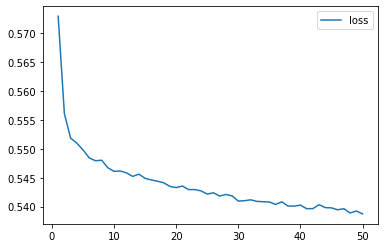

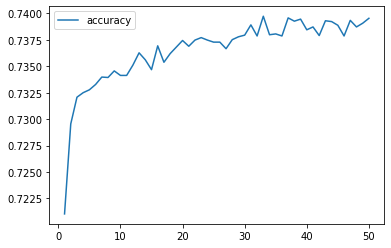

In [17]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

# Create a DataFrame containing training history
history_df = pd.DataFrame(fit_model.history, index=range(1,len(fit_model.history["loss"])+1))

# Plot the loss
history_df.plot(y="loss")

# Plot the accuracy
history_df.plot(y="accuracy")

In the following revision to the neural network, we will increase the number of epochs in the training regimen from 50 to 100. As the number of epochs increases, so does the amount of information provided to each neuron. By providing each neuron more information from the input data, the neurons are more likely to apply more effective weight coefficients. This may not be the most effective method because if the model produces weight coefficients that are too effective, there is an increased chance of overfitting. Nonetheless, lets give it a try.

In [18]:
# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.
number_input_features = len(X_train[0])
hidden_nodes_layer1 =  80
hidden_nodes_layer2 = 30

nn_new = tf.keras.models.Sequential()

# First hidden layer
nn_new.add(
    tf.keras.layers.Dense(units=hidden_nodes_layer1,
    input_dim=number_input_features, activation="relu")
)

# Second hidden layer
nn_new.add(tf.keras.layers.Dense(units=hidden_nodes_layer2, activation="relu"))

# Output layer
nn_new.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Compile the model
nn_new.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

# Define the checkpoint path and filenames
os.makedirs("checkpoints2/",exist_ok=True)
checkpoint_path = "checkpoints2/weights.{epoch:02d}.hdf5"

# Create a callback that saves the model's weights every 5 epochs
cp_callback = ModelCheckpoint(
    filepath=checkpoint_path,
    verbose=1,
    save_weights_only=True,
    save_freq=1000)

# Train the model
fit_model = nn_new.fit(X_train_scaled,y_train,epochs=100, callbacks=[cp_callback])

Epoch 1/100
804/804 [==============================] - 0s 518us/step - loss: 0.5685 - accuracy: 0.7241
Epoch 2/100
190/804 [======>.......................] - ETA: 0s - loss: 0.5573 - accuracy: 0.7280
Epoch 00002: saving model to checkpoints2\weights.02.hdf5
804/804 [==============================] - 0s 553us/step - loss: 0.5551 - accuracy: 0.7301
Epoch 3/100
386/804 [=============>................] - ETA: 0s - loss: 0.5530 - accuracy: 0.7308
Epoch 00003: saving model to checkpoints2\weights.03.hdf5
804/804 [==============================] - 0s 528us/step - loss: 0.5518 - accuracy: 0.7317
Epoch 4/100
574/804 [====================>.........] - ETA: 0s - loss: 0.5491 - accuracy: 0.7338
Epoch 00004: saving model to checkpoints2\weights.04.hdf5
804/804 [==============================] - 0s 536us/step - loss: 0.5506 - accuracy: 0.7330
Epoch 5/100
690/804 [========================>.....] - ETA: 0s - loss: 0.5493 - accuracy: 0.7324
Epoch 00005: saving model to checkpoints2\weights.05.hdf5
804/

804/804 [==============================] - 0s 504us/step - loss: 0.5403 - accuracy: 0.7386
Epoch 39/100
412/804 [==============>...............] - ETA: 0s - loss: 0.5412 - accuracy: 0.7395
Epoch 00039: saving model to checkpoints2\weights.39.hdf5
804/804 [==============================] - 0s 495us/step - loss: 0.5397 - accuracy: 0.7394
Epoch 40/100
605/804 [=====================>........] - ETA: 0s - loss: 0.5417 - accuracy: 0.7366
Epoch 00040: saving model to checkpoints2\weights.40.hdf5
804/804 [==============================] - 0s 503us/step - loss: 0.5397 - accuracy: 0.7386
Epoch 41/100
804/804 [==============================] - 0s 490us/step - loss: 0.5401 - accuracy: 0.7398
Epoch 42/100
  1/804 [..............................] - ETA: 0s - loss: 0.4068 - accuracy: 0.8125
Epoch 00042: saving model to checkpoints2\weights.42.hdf5
804/804 [==============================] - 0s 499us/step - loss: 0.5394 - accuracy: 0.7396
Epoch 43/100
204/804 [======>.......................] - ETA: 0s 

804/804 [==============================] - 0s 529us/step - loss: 0.5368 - accuracy: 0.7402
Epoch 76/100
697/804 [=========================>....] - ETA: 0s - loss: 0.5362 - accuracy: 0.7409
Epoch 00076: saving model to checkpoints2\weights.76.hdf5
804/804 [==============================] - 0s 510us/step - loss: 0.5368 - accuracy: 0.7406
Epoch 77/100
804/804 [==============================] - 0s 540us/step - loss: 0.5363 - accuracy: 0.7410
Epoch 78/100
  1/804 [..............................] - ETA: 0s - loss: 0.5426 - accuracy: 0.7500
Epoch 00078: saving model to checkpoints2\weights.78.hdf5
804/804 [==============================] - ETA: 0s - loss: 0.5364 - accuracy: 0.74 - 0s 533us/step - loss: 0.5366 - accuracy: 0.7403
Epoch 79/100
286/804 [=========>....................] - ETA: 0s - loss: 0.5308 - accuracy: 0.7433
Epoch 00079: saving model to checkpoints2\weights.79.hdf5
804/804 [==============================] - 0s 525us/step - loss: 0.5364 - accuracy: 0.7400
Epoch 80/100
404/804 [

268/268 - 0s - loss: 0.5588 - accuracy: 0.7257
Loss: 0.5588061809539795, Accuracy: 0.7257142663002014


<AxesSubplot:>

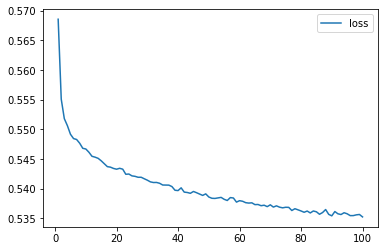

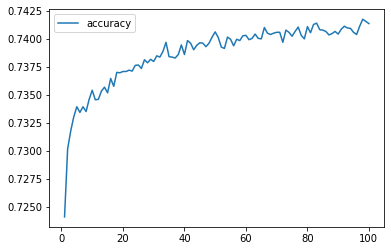

In [19]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn_new.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

# Create a DataFrame containing training history
history_df = pd.DataFrame(fit_model.history, index=range(1,len(fit_model.history["loss"])+1))

# Plot the loss
history_df.plot(y="loss")

# Plot the accuracy
history_df.plot(y="accuracy")

In the following model we will add a single hidden layer for a total of three hidden layers. Adding hidden layers changes the structure of the model, which allows neurons to train on activated input values, instead of looking at new training data. Therefore, a neural network with multiple layers can identify nonlinear characteristics of the input data without requiring more input data. There will be a greater chance of overfitting.

In [20]:
# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.
number_input_features = len(X_train[0])
hidden_nodes_layer1 =  100
hidden_nodes_layer2 = 30
hidden_nodes_layer3 = 10

nn_new1 = tf.keras.models.Sequential()

# First hidden layer
nn_new1.add(
    tf.keras.layers.Dense(units=hidden_nodes_layer1,
    input_dim=number_input_features, activation="relu")
)

# Second hidden layer
nn_new1.add(tf.keras.layers.Dense(units=hidden_nodes_layer2, activation="relu"))

# Third hidden layer
nn_new1.add(tf.keras.layers.Dense(units=hidden_nodes_layer3, activation="sigmoid"))

# Output layer
nn_new1.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Compile the model
nn_new1.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

# Define the checkpoint path and filenames
os.makedirs("checkpoints3/",exist_ok=True)
checkpoint_path = "checkpoints3/weights.{epoch:02d}.hdf5"

# Create a callback that saves the model's weights every 5 epochs
cp_callback = ModelCheckpoint(
    filepath=checkpoint_path,
    verbose=1,
    save_weights_only=True,
    save_freq=1000)

# Train the model
fit_model = nn_new1.fit(X_train_scaled,y_train,epochs=100, callbacks=[cp_callback])

Epoch 1/100
804/804 [==============================] - 0s 552us/step - loss: 0.5734 - accuracy: 0.7232
Epoch 2/100
161/804 [=====>........................] - ETA: 0s - loss: 0.5574 - accuracy: 0.7294
Epoch 00002: saving model to checkpoints3\weights.02.hdf5
804/804 [==============================] - 0s 594us/step - loss: 0.5563 - accuracy: 0.7298
Epoch 3/100
369/804 [============>.................] - ETA: 0s - loss: 0.5513 - accuracy: 0.7363
Epoch 00003: saving model to checkpoints3\weights.03.hdf5
804/804 [==============================] - 0s 561us/step - loss: 0.5531 - accuracy: 0.7333
Epoch 4/100
533/804 [==================>...........] - ETA: 0s - loss: 0.5541 - accuracy: 0.7268
Epoch 00004: saving model to checkpoints3\weights.04.hdf5
804/804 [==============================] - 0s 581us/step - loss: 0.5515 - accuracy: 0.7312
Epoch 5/100
722/804 [=========================>....] - ETA: 0s - loss: 0.5506 - accuracy: 0.7327
Epoch 00005: saving model to checkpoints3\weights.05.hdf5
804/

804/804 [==============================] - 0s 566us/step - loss: 0.5389 - accuracy: 0.7384
Epoch 39/100
437/804 [===============>..............] - ETA: 0s - loss: 0.5405 - accuracy: 0.7363
Epoch 00039: saving model to checkpoints3\weights.39.hdf5
804/804 [==============================] - 0s 579us/step - loss: 0.5388 - accuracy: 0.7398
Epoch 40/100
623/804 [======================>.......] - ETA: 0s - loss: 0.5370 - accuracy: 0.7407
Epoch 00040: saving model to checkpoints3\weights.40.hdf5
804/804 [==============================] - 0s 584us/step - loss: 0.5384 - accuracy: 0.7400
Epoch 41/100
804/804 [==============================] - 0s 582us/step - loss: 0.5385 - accuracy: 0.7390
Epoch 42/100
  1/804 [..............................] - ETA: 0s - loss: 0.4680 - accuracy: 0.7812
Epoch 00042: saving model to checkpoints3\weights.42.hdf5
804/804 [==============================] - 0s 564us/step - loss: 0.5390 - accuracy: 0.7400
Epoch 43/100
170/804 [=====>........................] - ETA: 0s 

804/804 [==============================] - 0s 568us/step - loss: 0.5362 - accuracy: 0.7412
Epoch 76/100
643/804 [======================>.......] - ETA: 0s - loss: 0.5369 - accuracy: 0.7398
Epoch 00076: saving model to checkpoints3\weights.76.hdf5
804/804 [==============================] - 0s 556us/step - loss: 0.5359 - accuracy: 0.7409
Epoch 77/100
804/804 [==============================] - 0s 550us/step - loss: 0.5356 - accuracy: 0.7411
Epoch 78/100
 89/804 [==>...........................] - ETA: 0s - loss: 0.5308 - accuracy: 0.7507
Epoch 00078: saving model to checkpoints3\weights.78.hdf5
804/804 [==============================] - 0s 559us/step - loss: 0.5356 - accuracy: 0.7407
Epoch 79/100
276/804 [=========>....................] - ETA: 0s - loss: 0.5338 - accuracy: 0.7394
Epoch 00079: saving model to checkpoints3\weights.79.hdf5
804/804 [==============================] - 0s 563us/step - loss: 0.5362 - accuracy: 0.7410
Epoch 80/100
447/804 [===============>..............] - ETA: 0s 

268/268 - 0s - loss: 0.5572 - accuracy: 0.7235
Loss: 0.5571781396865845, Accuracy: 0.723498523235321


<AxesSubplot:>

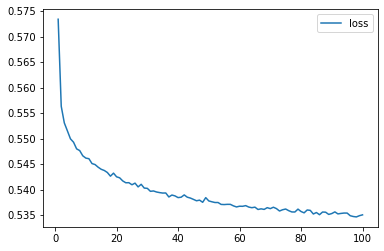

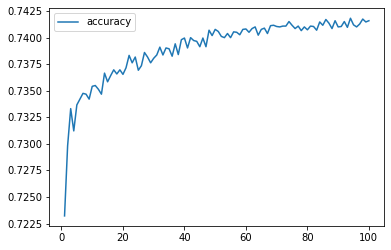

In [21]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn_new1.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

# Create a DataFrame containing training history
history_df = pd.DataFrame(fit_model.history, index=range(1,len(fit_model.history["loss"])+1))

# Plot the loss
history_df.plot(y="loss")

# Plot the accuracy
history_df.plot(y="accuracy")

In the next NN model we will change the activation function of the second hidden layer to a sigmoid function rather than a relu function to see if that changes the our performance metrics.

In [22]:
# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.
number_input_features = len(X_train[0])
hidden_nodes_layer1 =  100
hidden_nodes_layer2 = 30
hidden_nodes_layer3 = 10

nn_new2 = tf.keras.models.Sequential()

# First hidden layer
nn_new2.add(
    tf.keras.layers.Dense(units=hidden_nodes_layer1,
    input_dim=number_input_features, activation="sigmoid")
)

# Second hidden layer
nn_new2.add(tf.keras.layers.Dense(units=hidden_nodes_layer2, activation="sigmoid"))

# Third hidden layer
nn_new2.add(tf.keras.layers.Dense(units=hidden_nodes_layer3, activation="sigmoid"))

# Output layer
nn_new2.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Compile the model
nn_new2.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

# Define the checkpoint path and filenames
os.makedirs("checkpoints4/",exist_ok=True)
checkpoint_path = "checkpoints4/weights.{epoch:02d}.hdf5"

# Create a callback that saves the model's weights every 5 epochs
cp_callback = ModelCheckpoint(
    filepath=checkpoint_path,
    verbose=1,
    save_weights_only=True,
    save_freq=1000)

# Train the model
fit_model = nn_new2.fit(X_train_scaled,y_train,epochs= 50, callbacks=[cp_callback])

Epoch 1/50
804/804 [==============================] - 0s 559us/step - loss: 0.6005 - accuracy: 0.6988
Epoch 2/50
172/804 [=====>........................] - ETA: 0s - loss: 0.5823 - accuracy: 0.7222
Epoch 00002: saving model to checkpoints4\weights.02.hdf5
804/804 [==============================] - 0s 607us/step - loss: 0.5742 - accuracy: 0.7301
Epoch 3/50
366/804 [============>.................] - ETA: 0s - loss: 0.5729 - accuracy: 0.7298
Epoch 00003: saving model to checkpoints4\weights.03.hdf5
804/804 [==============================] - 0s 567us/step - loss: 0.5729 - accuracy: 0.7300
Epoch 4/50
558/804 [===================>..........] - ETA: 0s - loss: 0.5730 - accuracy: 0.7289
Epoch 00004: saving model to checkpoints4\weights.04.hdf5
804/804 [==============================] - 0s 550us/step - loss: 0.5706 - accuracy: 0.7310
Epoch 5/50
779/804 [============================>.] - ETA: 0s - loss: 0.5646 - accuracy: 0.7321
Epoch 00005: saving model to checkpoints4\weights.05.hdf5
804/804 [

Epoch 39/50
364/804 [============>.................] - ETA: 0s - loss: 0.5450 - accuracy: 0.7338
Epoch 00039: saving model to checkpoints4\weights.39.hdf5
804/804 [==============================] - 0s 565us/step - loss: 0.5428 - accuracy: 0.7362
Epoch 40/50
622/804 [======================>.......] - ETA: 0s - loss: 0.5416 - accuracy: 0.7368
Epoch 00040: saving model to checkpoints4\weights.40.hdf5
804/804 [==============================] - 0s 580us/step - loss: 0.5430 - accuracy: 0.7358
Epoch 41/50
804/804 [==============================] - 0s 560us/step - loss: 0.5426 - accuracy: 0.7371
Epoch 42/50
  1/804 [..............................] - ETA: 0s - loss: 0.5778 - accuracy: 0.7500
Epoch 00042: saving model to checkpoints4\weights.42.hdf5
804/804 [==============================] - 0s 547us/step - loss: 0.5423 - accuracy: 0.7369
Epoch 43/50
174/804 [=====>........................] - ETA: 0s - loss: 0.5410 - accuracy: 0.7344
Epoch 00043: saving model to checkpoints4\weights.43.hdf5
804/

268/268 - 0s - loss: 0.5506 - accuracy: 0.7273
Loss: 0.550602912902832, Accuracy: 0.7273469567298889


<AxesSubplot:>

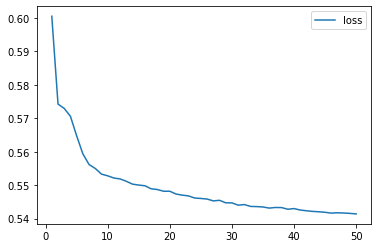

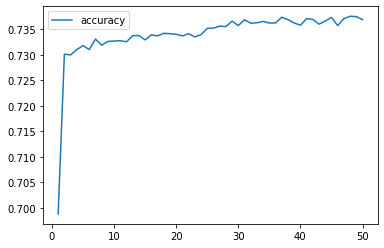

In [23]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn_new2.evaluate(X_test_scaled,y_test,verbose=2)
model_performance = print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")
model_performance

# Create a DataFrame containing training history
history_df = pd.DataFrame(fit_model.history, index=range(1,len(fit_model.history["loss"])+1))

# Plot the loss
history_df.plot(y="loss")

# Plot the accuracy
history_df.plot(y="accuracy")